По материалам

https://www.kaggle.com/code/abirhasan1703100/hopfield-neural-networks-algorithm

https://github.com/nosratullah/hopfieldNeuralNetwork/tree/master

# Теоретическое описание

Сеть Хопфилда состоит из нейронов, каждый из которых может принимать на входе и выходе только два значения. Всего в сети бывает $N$ нейронов.

$y_i = \left\{\begin{matrix} 1, \\ -1\end{matrix}\right.$

Сеть полностью рекурентная. Состоит из одного слоя, в которой каждый нейрон связан с другими нейронами. Схема сети представлена ниже.

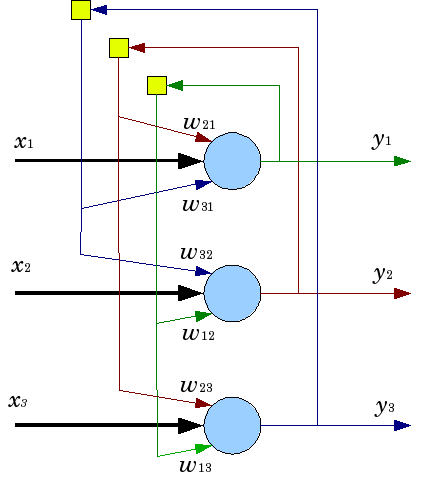

Ключевое правило сети, на основании которой можно вычислить все веса выглядит следующим образом: $X_i=WX_i$

$X_i$ - запомненные образы.

Таким образом веса вычисляются по формуле:
$W=\frac{1}{N}\sum_{i}X_{i}X_{i}^{T}$

Сеть считает веса один раз, затем остаётся в таком состоянии.

Применяется сеть последовательно с использованием пороговой функции активнации $F = sgn(x)$.

$X(t+1)=F(WX(t))$

Расчёт состояний заканчивается тогда, когда либо состояния совпадут, либо число итераций для применения закончится.

## Пример №1

In [2]:
import numpy as np

In [3]:
etalons = np.array([
    [-1, -1, 1, -1, 1],
    [1, -1, 1, -1, 1],
    [-1, 1, -1, 1, -1],
    [1, 1, 1, -1, -1]
])

objects = np.array([
    [-1, -1, -1, -1, 1],
    [1, -1, 1, -1, -1],
    [-1, 1, -1, -1, -1],
    [-1, 1, -1, -1, -1]
])

size = etalons.shape[1]

In [4]:
weights = np.zeros((size, size))

for pattern in etalons:
    pattern = np.reshape(pattern, (1, size))
    weights += np.dot(pattern.T, pattern)
np.fill_diagonal(weights, 0)

weights

array([[ 0.,  0.,  2., -2.,  0.],
       [ 0.,  0., -2.,  2., -4.],
       [ 2., -2.,  0., -4.,  2.],
       [-2.,  2., -4.,  0., -2.],
       [ 0., -4.,  2., -2.,  0.]])

In [5]:
import numpy as np

reshaped_etalons = etalons[:, :, np.newaxis]  # shape (n_samples, n_features, 1)
weights2 = np.sum(reshaped_etalons * reshaped_etalons.transpose(0, 2, 1), axis=0)

np.fill_diagonal(weights2, 0)

weights2 == weights

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [6]:
max_iterations=10

for i, noisy_pattern in enumerate(objects):
    iteration = 0
    while iteration < max_iterations:
        iteration += 1
        prev_pattern = np.copy(noisy_pattern)
        noisy_pattern = np.sign(np.dot(noisy_pattern, weights))
        if np.array_equal(noisy_pattern, prev_pattern):
            break

#         distances = np.sum(np.abs(patterns - noisy_pattern), axis=1)
#         closest_match_idx = np.argmin(distances)

    #print('{:<25} {:<10} {:<10}'.format("Исходный объект", i, str(tuple(etalons[i]))))
    print('{:<25} {:<10} {:<10}'.format("Зшумлённый объект", i, str(tuple(objects[i]))))
    print('{:<25} {:<10} {:<10}'.format("Результат востановления", i, str(tuple(noisy_pattern))))

    print("")

Зшумлённый объект         0          (-1, -1, -1, -1, 1)
Результат востановления   0          (1.0, -1.0, 1.0, -1.0, 1.0)

Зшумлённый объект         1          (1, -1, 1, -1, -1)
Результат востановления   1          (1.0, -1.0, 1.0, -1.0, 1.0)

Зшумлённый объект         2          (-1, 1, -1, -1, -1)
Результат востановления   2          (-1.0, 1.0, -1.0, 1.0, -1.0)

Зшумлённый объект         3          (-1, 1, -1, -1, -1)
Результат востановления   3          (-1.0, 1.0, -1.0, 1.0, -1.0)



## Пример №2

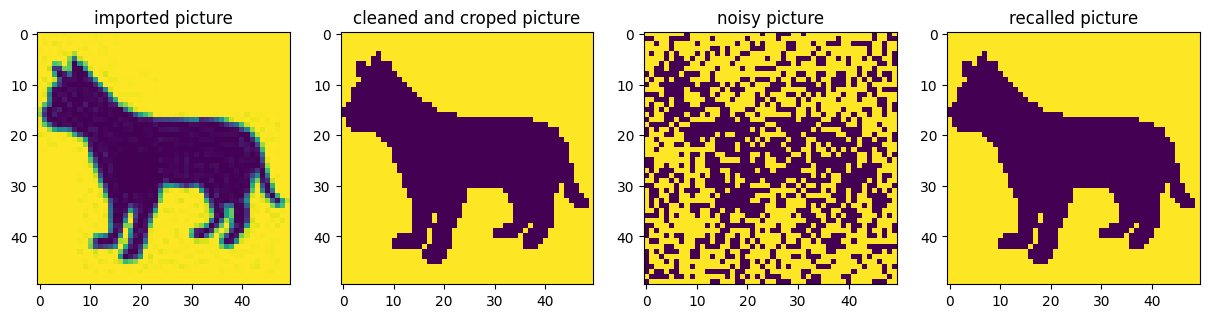

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import time

def trainer(vector):
    vector = vector.flatten()

    coefMat = np.zeros([len(vector),len(vector)])

    for i in range(len(vector)):
        for j in range(len(vector)):
            if (i!=(i-j)):
                coefMat[i][i-j] = vector[i]*vector[i-j]

    vector = np.reshape(vector, [int(np.sqrt(len(vector))),int(np.sqrt(len(vector)))])

    return coefMat

def prediction(curuptedVec,coefMat):
    curuptedVec = curuptedVec.flatten()

    predictVec = np.zeros(len(curuptedVec))
    for i in range(len(curuptedVec)):
        temp = 0
        for j in range(len(curuptedVec)):
             temp += coefMat[i][j] * curuptedVec[j]
        if (temp>0):
            predictVec[i] = 1
        if (temp<0):
            predictVec[i] = -1
    
    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))),int(np.sqrt(len(predictVec)))])
    return predictVec

def imageGenerator(imageVector : np.array, vmax = 230):

    cleanImage = np.zeros([len(imageVector),len(imageVector)])
    for i in range(len(imageVector)):
        for j in range(len(imageVector)):
            if (imageVector[i][j] >= vmax):
                cleanImage[i][j] = 1
            else:
                cleanImage[i][j] = -1

    noisyImage = cleanImage + np.random.normal(0, 2, [len(image),len(image)])
    for i in range(len(image)):
        for j in range(len(image)):
            if (noisyImage[i][j] >= 0):
                noisyImage[i][j] = 1
            else:
                noisyImage[i][j] = -1

    return cleanImage,noisyImage

#Import the image
image = img.imread('n04_cat.jpg').astype(np.int32)
vector_old,noisyVec = imageGenerator(image)
coefMatrix = trainer(vector_old)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector_old);
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec);
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec);
plt.title('recalled picture')
plt.show()

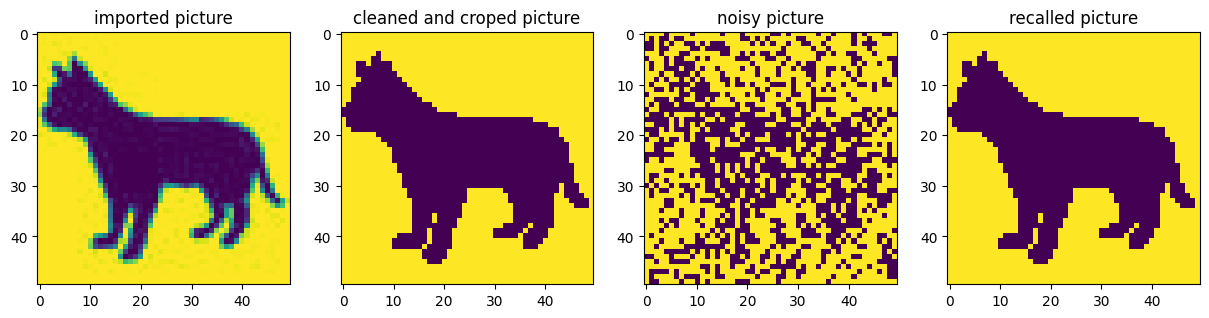

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

def trainer(vector):
    vector = vector.flatten()
    coefMat = np.zeros([len(vector),len(vector)])

    i, j = np.indices((len(vector), len(vector)))
    mask = i != (i-j)
    coefMat[mask] = vector[i[mask]] * vector[j[mask]]
    
    vector = np.reshape(vector, [int(np.sqrt(len(vector))),int(np.sqrt(len(vector)))])

    return coefMat

def prediction(curuptedVec,coefMat):
    curuptedVec = curuptedVec.flatten()
    temp = np.dot(coefMat, curuptedVec)
    predictVec = np.where(temp > 0, 1, -1) 

    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))), int(np.sqrt(len(predictVec)))])
    return predictVec

def imageGenerator(imageVector, vmax = 1):
    cleanImage = np.zeros([len(imageVector),len(imageVector)])
    
    cleanImage = np.where(imageVector >= vmax, 1, -1)
    noisyImage = cleanImage + np.random.normal(0, 2, [len(image),len(image)])

    noisyImage = np.where(noisyImage >= 0, 1, -1)

    return cleanImage,noisyImage

#Import the image
image = img.imread('n04_cat.jpg','r').copy()
vector,noisyVec = imageGenerator(image, 230)
coefMatrix = trainer(vector)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector)
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec)
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec)
plt.title('recalled picture')
plt.show()

In [3]:
(vector_old == vector).all()

True